In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\\Users\\pc\\Desktop\\Data science\\vgsales.csv")

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
df.shape

(16598, 11)

## Checking For Missing Values 

In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]

In [9]:
features_with_na

['Year', 'Publisher']

In [10]:
#dropped rows which have atleast one null value. 
#as compared to data null value is very least thats why we drop rows.

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## numerical features

In [14]:
numerical_features=[feature for feature in df if df[feature].dtypes!='O']

In [15]:
print(len(numerical_features))

df[numerical_features].head()

7


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Try to findout patterns and relation

Text(0.5, 1.0, 'Sales vs Year Sold')

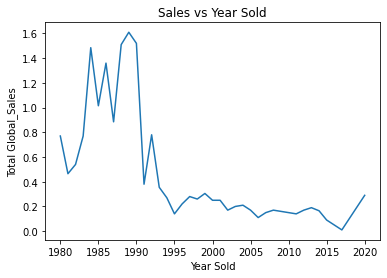

In [17]:
df.groupby('Year')['Global_Sales'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Total Global_Sales')
plt.title('Sales vs Year Sold')

In [18]:
#In these point we see that in  globly sales having major drop after year1989 or 1990 .

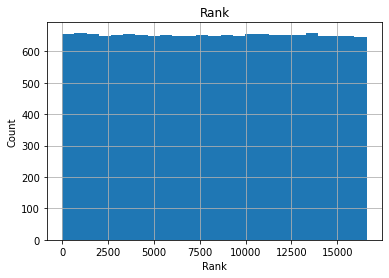

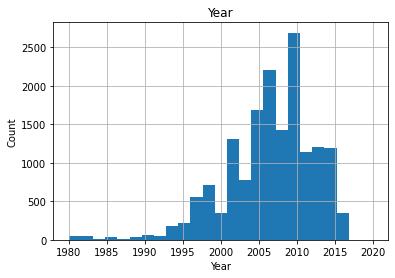

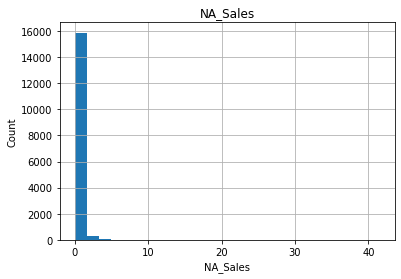

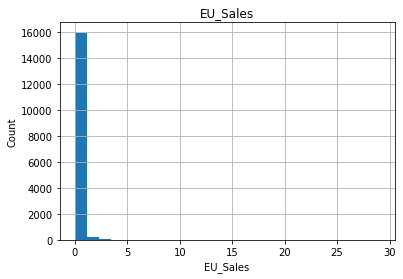

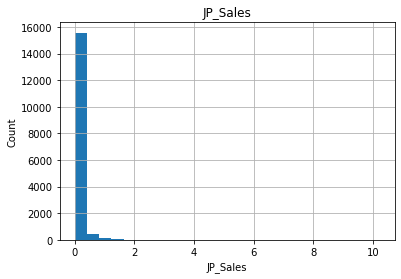

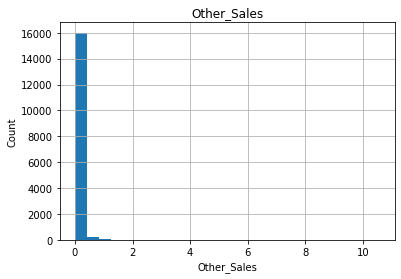

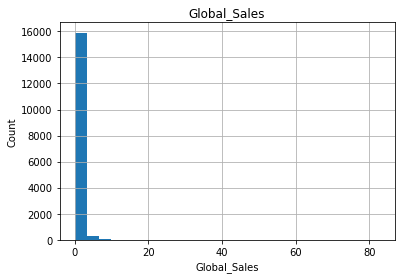

In [19]:
### Lets analyze the numerical values by creating histograms to understand the distribution
data=df.copy()
for feature in numerical_features:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

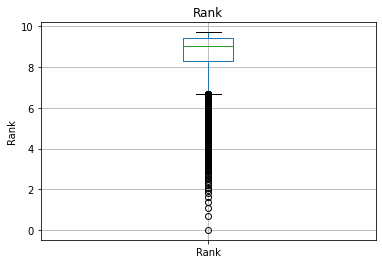

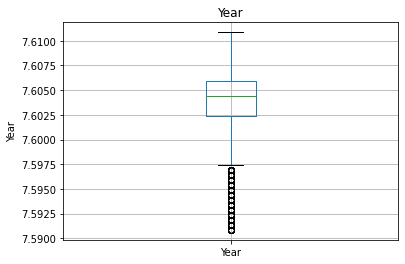

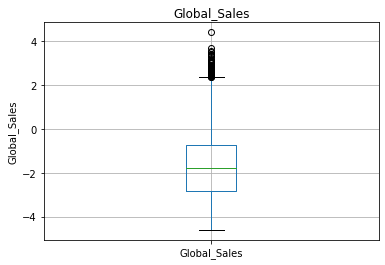

In [20]:
## Outliers 
for feature in numerical_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

<AxesSubplot: >

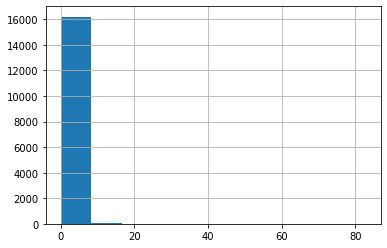

In [21]:
df["Global_Sales"].hist()

<AxesSubplot: xlabel='Global_Sales', ylabel='Count'>

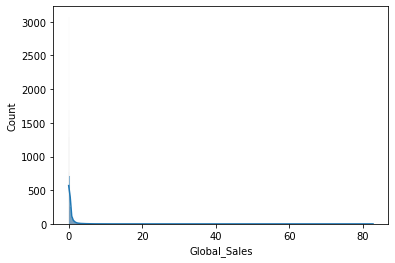

In [22]:
sns.histplot(df['Global_Sales'],kde=True)

## Categorical Variables

In [23]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
df[categorical_features].head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [24]:
for feature in categorical_features :
    print(" The feature name is {} and the number of categories are {}".format(feature,len(df[feature].unique())))

 The feature name is Name and the number of categories are 11325
 The feature name is Platform and the number of categories are 31
 The feature name is Genre and the number of categories are 12
 The feature name is Publisher and the number of categories are 576


In [25]:
df[categorical_features].drop(['Name'], axis=1)

,Platform,Genre,Publisher
0,Wii,Sports,Nintendo
1,NES,Platform,Nintendo
2,Wii,Racing,Nintendo
3,Wii,Sports,Nintendo
4,GB,Role-Playing,Nintendo
...,...,...,...
16593,GBA,Platform,Kemco
16594,GC,Shooter,Infogrames
16595,PS2,Racing,Activision
16596,DS,Puzzle,7G//AMES


<AxesSubplot: >

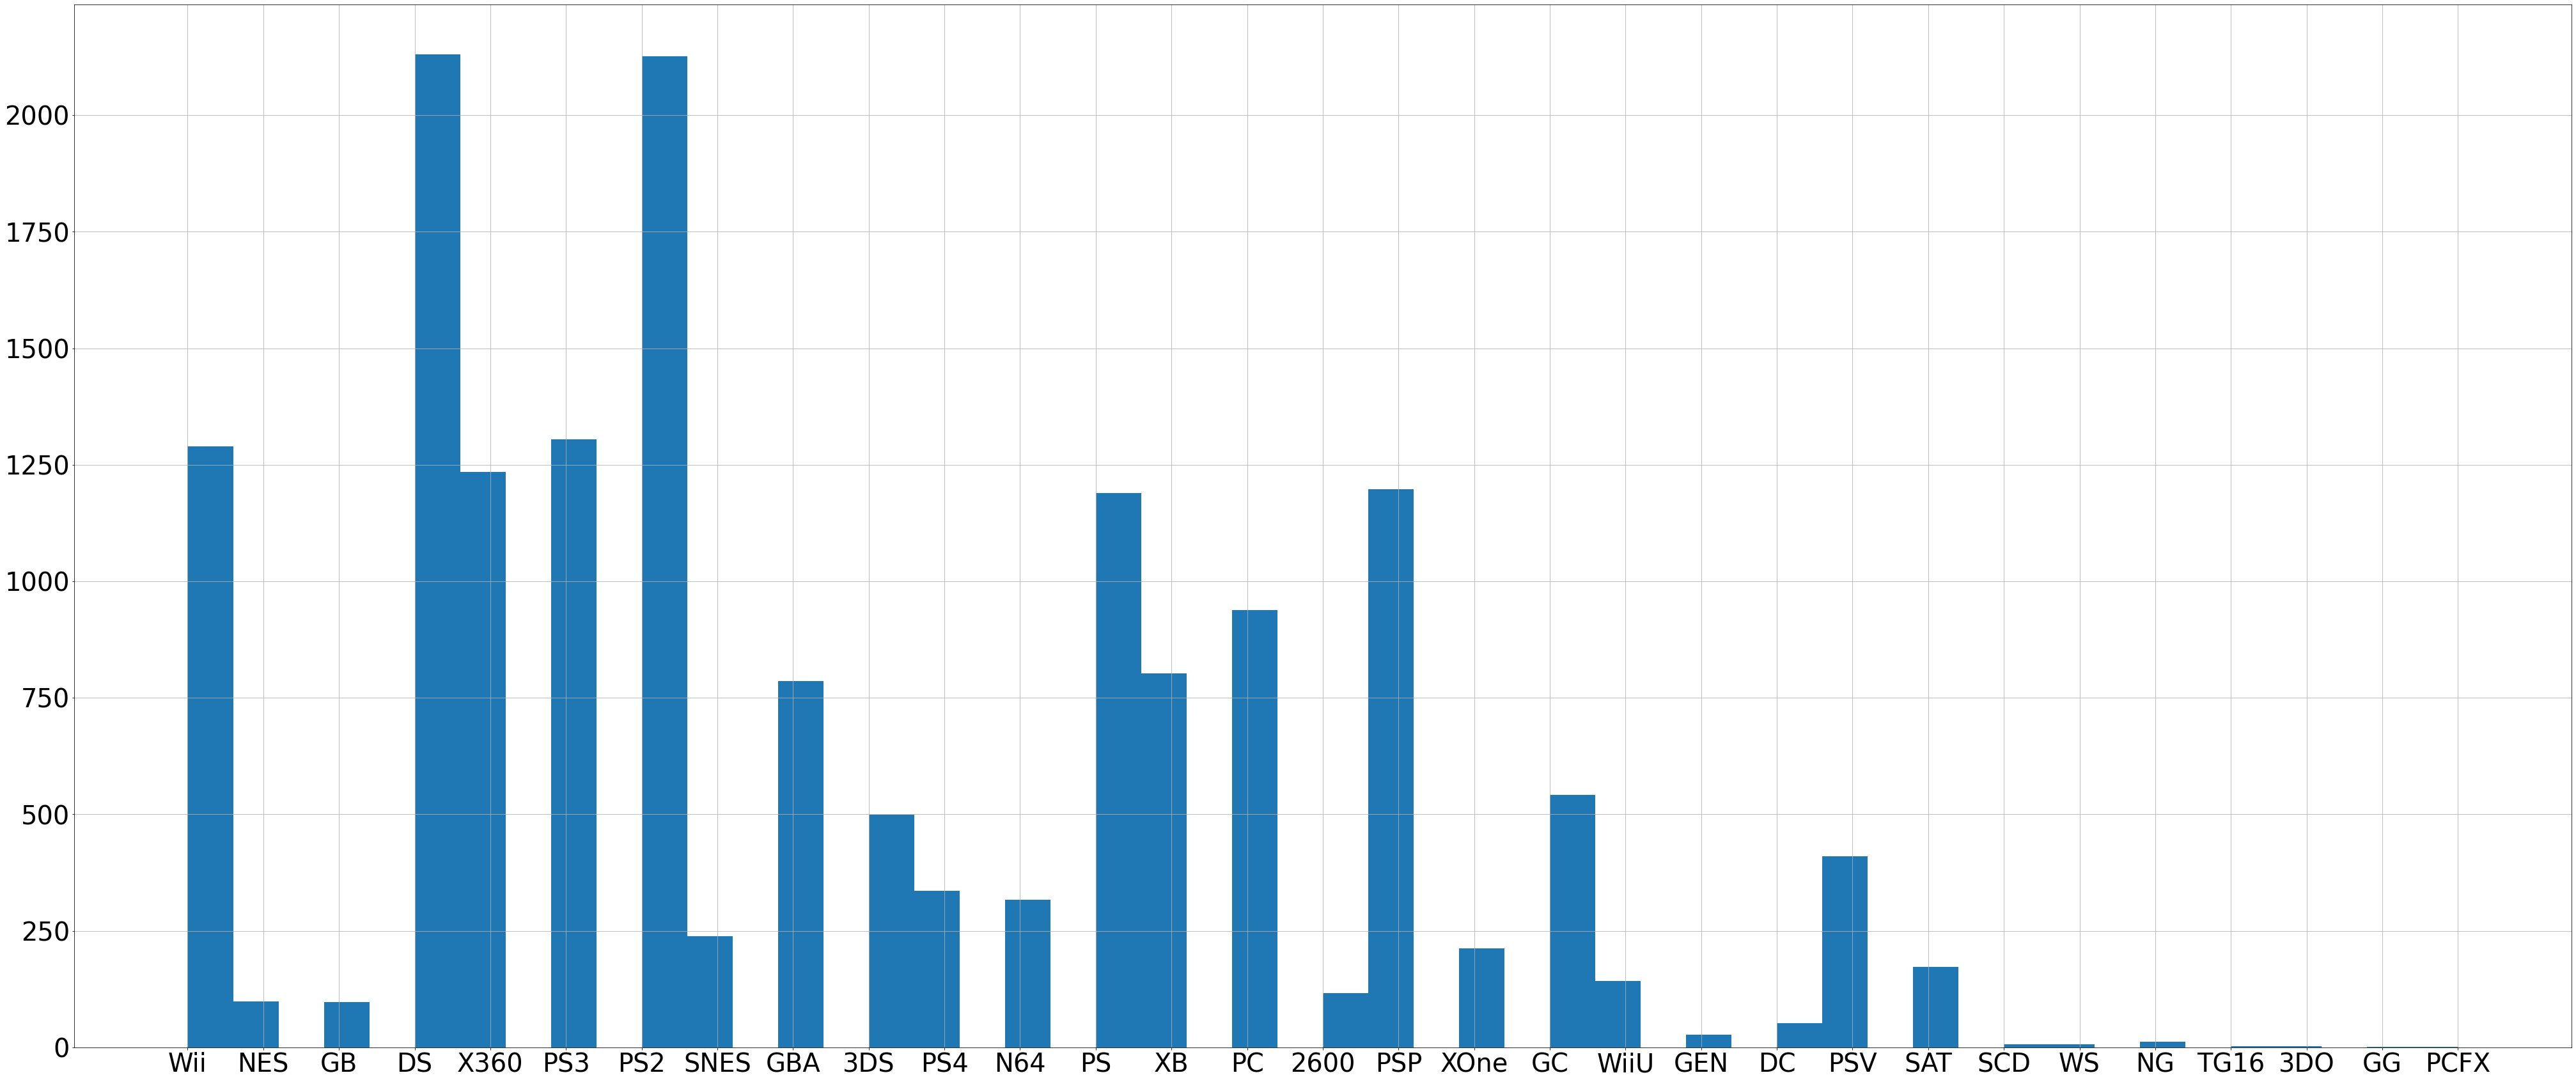

In [26]:
df["Platform"].hist(bins=50,figsize=(70,30),xlabelsize= 40,ylabelsize=40)

<AxesSubplot: >

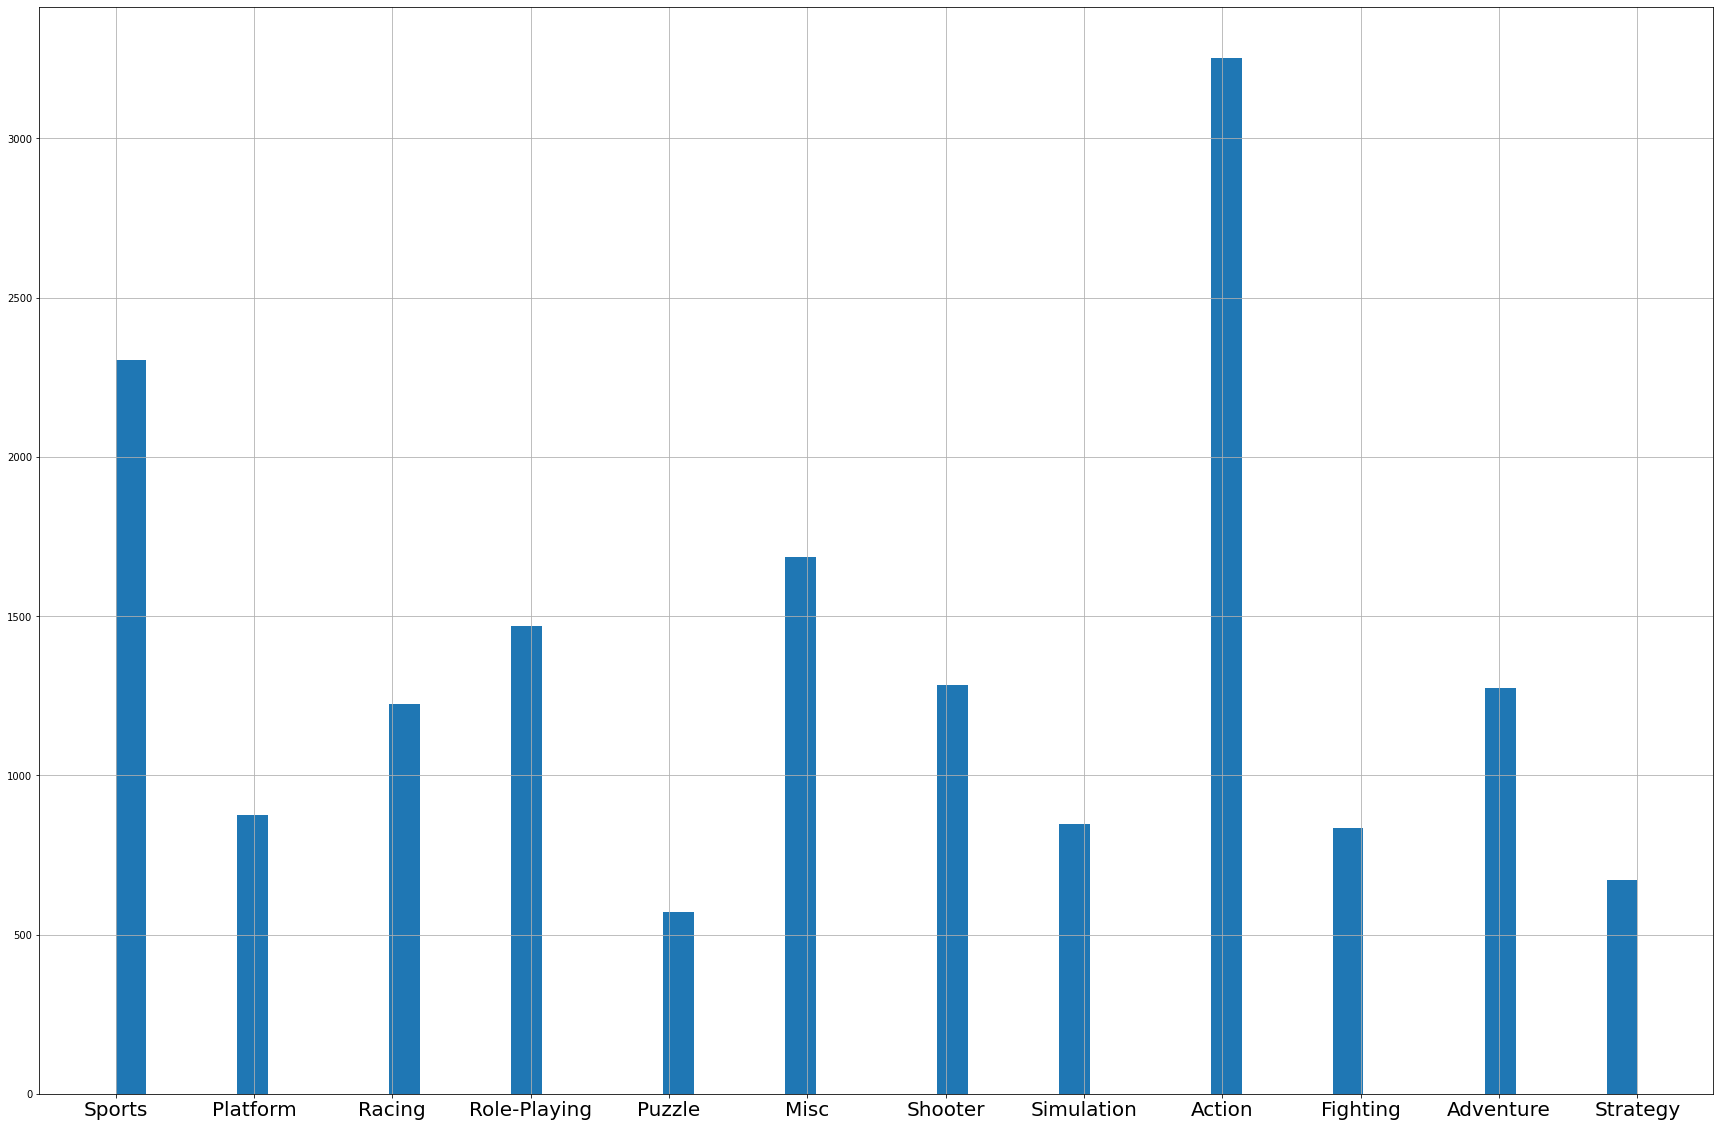

In [27]:
df["Genre"].hist(bins=50,figsize=(30,20),xlabelsize= 20)

<AxesSubplot: >

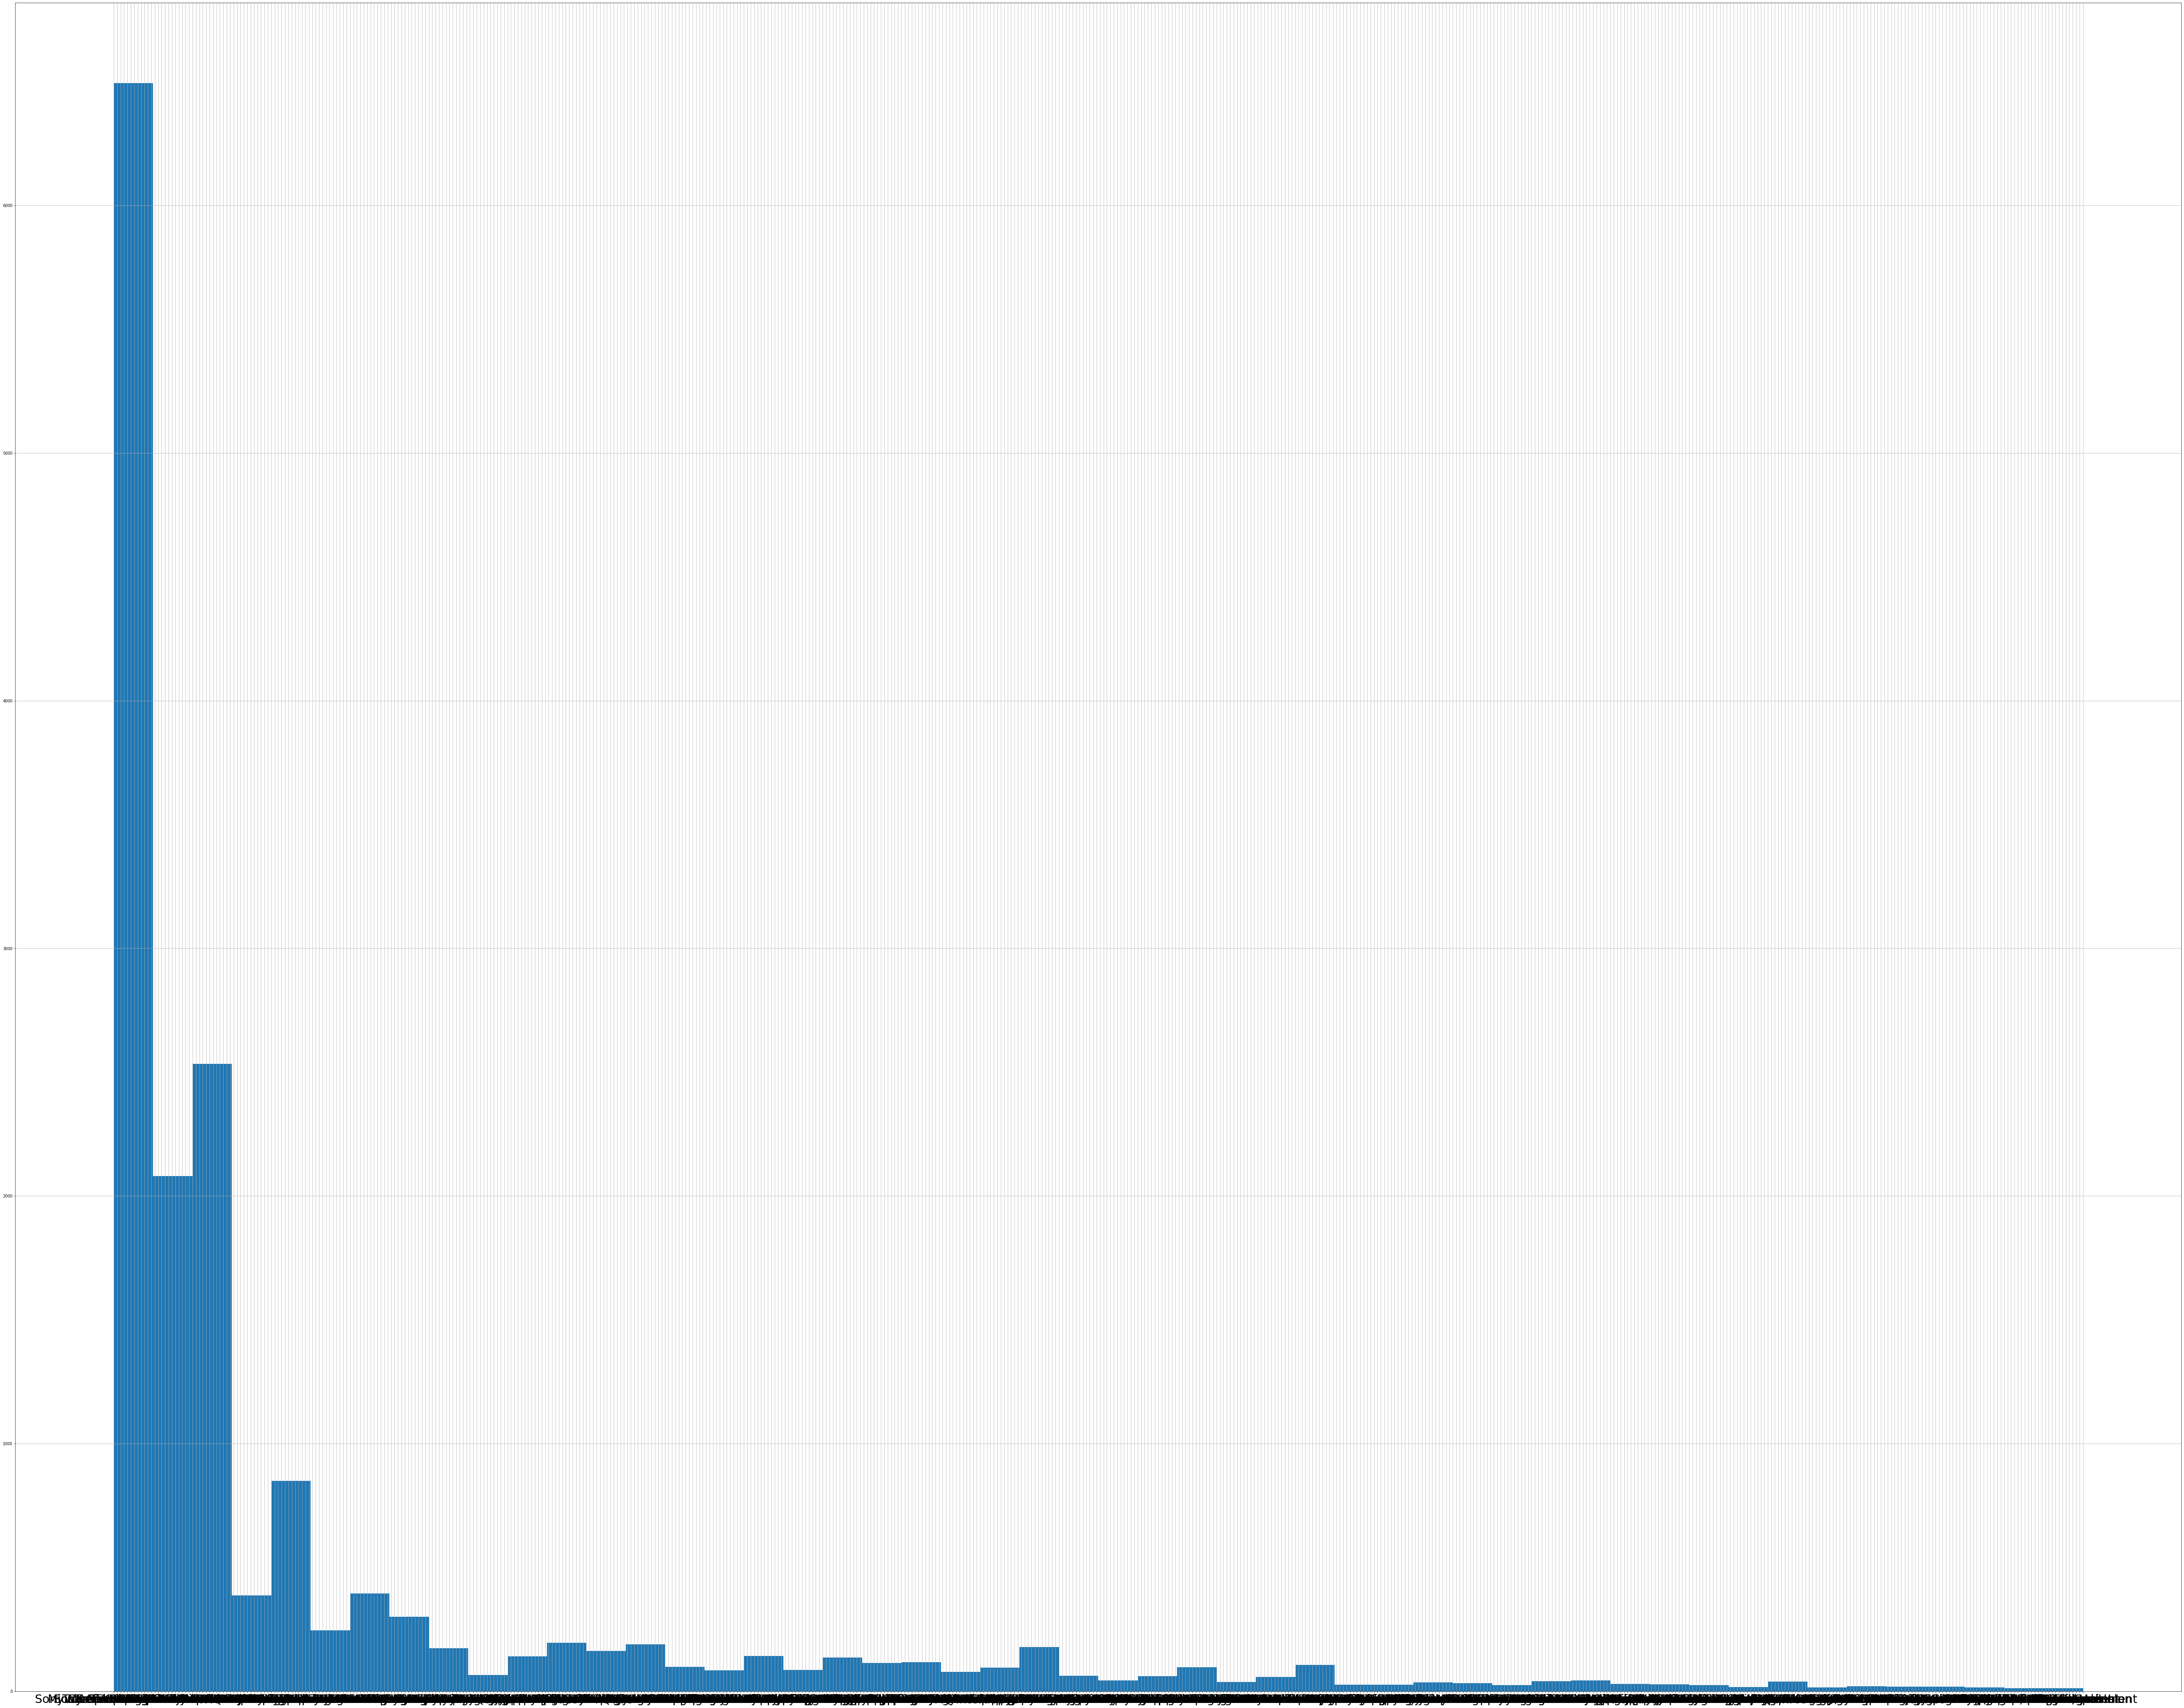

In [28]:
df["Publisher"].hist(bins=50,figsize=(100,80),xlabelsize= 30)

Analysis points:

1.In these point we see that in  globly sales having major drop after year1989 or 1990.
2. 2010 has most sales.
3. ds and Ps2 both have maximum platform from which most sales happen.
4. Action category genre has max sales and puzzle category genre has min sales.
5. from publisher Nintendo has max sales.
6. If we have to increse sales we have to increase nintendo publisher, with Action category genre      product